In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

from RaTag.alphas.energy_map_reader import load_energy_index
from RaTag.pipelines.xray_only import xray_pipeline
from RaTag.core.datatypes import Run
from RaTag.workflows.run_construction import initialize_run

%matplotlib inline

In [4]:
path_run = Path('/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi')
run = Run(
    run_id="RUN18",
    root_directory=path_run,
    target_isotope="Th228",
    pressure=2.0,
    temperature=297.0,
    sampling_rate=5.0,
    drift_gap=1.4,
    el_gap=0.8,
    el_field=2375.0,
    sets=[]
)
run = initialize_run(run)


RUN INITIALIZATION

[1/3] Gas density...
  ✓ Gas density: 4.877e+19 cm⁻³

[2/3] Populating sets...
Detected multi-isotope files...
  Loaded: FieldScan_Gate0050_Anode1950 - 50 files (2400 waveforms) [FastFrame (48 frames/file)]
Detected multi-isotope files...
  Loaded: FieldScan_Gate0100_Anode2000 - 50 files (2400 waveforms) [FastFrame (48 frames/file)]
Detected multi-isotope files...
  Loaded: FieldScan_Gate0200_Anode2100 - 50 files (2400 waveforms) [FastFrame (48 frames/file)]
  ✓ Loaded 3 sets

[3/3] Computing fields and transport properties...
  ✓ FieldScan_Gate0050_Anode1950: Computed and saved to cache
  ✓ FieldScan_Gate0100_Anode2000: Computed and saved to cache
  ✓ FieldScan_Gate0200_Anode2100: Computed and saved to cache

✓ Run initialization complete


# Run xray-only pipeline

In [10]:
xray_results = xray_pipeline(run)


X-RAY CLASSIFICATION PIPELINE: RUN18

X-RAY CLASSIFICATION

Set 1/3: FieldScan_Gate0050_Anode1950
  📂 Loaded from cache (n_accepted=433, data file exists)

Set 2/3: FieldScan_Gate0100_Anode2000
  📂 Loaded from cache (n_accepted=350, data file exists)

Set 3/3: FieldScan_Gate0200_Anode2100
  📂 Loaded from cache (n_accepted=394, data file exists)

X-RAY CLASSIFICATION VALIDATION

Set 1/3: FieldScan_Gate0050_Anode1950
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0050_Anode1950_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 2/3: FieldScan_Gate0100_Anode2000
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0100_Anode2000_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 3/3: FieldScan_Gate0200_Anode2100
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate02

In [ ]:
from RaTag.workflows.xray_integration import validate_xray_classification

# Validate classification - visualize accepted vs rejected events
# The min_xray_area filter is now applied during classification (see XRayConfig)
xray_results = validate_xray_classification(xray_results, n_waveforms=5)


X-RAY CLASSIFICATION VALIDATION
Filtering accepted events: area >= 0.100 mV·µs

Set 1/3: FieldScan_Gate0050_Anode1950
  Filtered to 32 events with area >= 0.100 mV·µs
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0050_Anode1950_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 2/3: FieldScan_Gate0100_Anode2000
  Filtered to 7 events with area >= 0.100 mV·µs
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0050_Anode1950_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 2/3: FieldScan_Gate0100_Anode2000
  Filtered to 7 events with area >= 0.100 mV·µs
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0100_Anode2000_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 3/3: FieldScan_Gate0200_Anode2100
  Filtered to 5 events with area >= 0.100 mV·µs
 

# Validate X-ray Classification

Visualize accepted vs rejected X-ray events. 

**Note:** Quality filters (min_xray_area, max_area_s1, max_area_s2) are now applied during classification in the pipeline. To change these thresholds, modify the `XRayConfig` parameters before running the classification workflow.

In [5]:
path_50 = Path('/Volumes/KINGSTON/RaTag_data/RUN18/processed_data/all/FieldScan_Gate0050_Anode1950_xray_areas.npz')

xray_data = np.load(path_50, allow_pickle=True)
# xray_data['xray_areas']

[Text(0.5, 0, 'X-ray area [V·us]'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'X-ray area distribution for RUN18 - 1950V Anode, 50V Gate')]

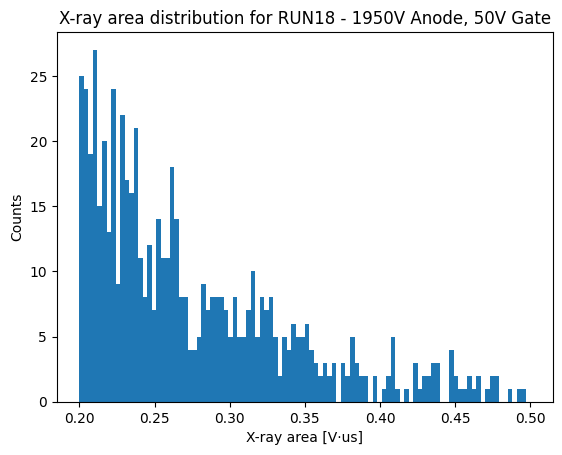

In [26]:
n, bins, patches = plt.hist(xray_data['xray_areas'], bins=100, range=(0.2, 0.5))
plt.gca().set(xlabel='X-ray area [V·us]', ylabel='Counts', title='X-ray area distribution for RUN18 - 1950V Anode, 50V Gate')